In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('diabetes.csv')
first_df = df[df['Insulin'] == 0].drop('Insulin', axis=1)
second_df = df[df['Insulin'] != 0].drop('Insulin', axis=1)

In [85]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [86]:
# Коэффициент контингентности

# Событие A - инсулин равен нулю
# Событие B - глюкоза выше порогового значения

k_coger_max = None
glucose_threshold_coger_max = None

for glucose_threshold in range(min(df['Glucose']), max(df['Glucose']) + 1):
    a = sum((df['Insulin'] == 0) & (df['Glucose'] > glucose_threshold))
    b = sum((df['Insulin'] != 0) & (df['Glucose'] > glucose_threshold))
    c = sum((df['Insulin'] == 0) & (df['Glucose'] <= glucose_threshold))
    d = sum((df['Insulin'] != 0) & (df['Glucose'] <= glucose_threshold))

    if (a + b) * (c + d) * (a + c) * (b + d) == 0:
        continue

    k_coger = (a * d - b * c) / ((a + b) * (c + d) * (a + c) * (b + d)) ** .5

    if k_coger_max is None or abs(k_coger) > abs(k_coger_max):
        k_coger_max = k_coger
        glucose_threshold_max = glucose_threshold

error_k_coger_max = (1 - k_coger_max ** 2) / (len(df['Glucose']) - 1) ** .5

k_coger_max, error_k_coger_max

# -0.09429338384199826 +- 0.03578686308384253 → 0 =>
# => нет порогового значения, при котором наблюдалась бы
#    зависимость между уровнем глюкозы и разделением на две выборки

(-0.09429338384199826, 0.03578686308384253)

In [87]:
# Коэффициент корреляции Пирсона

mean_insulin = (df['Insulin'] == 0).mean()
mean_glucose = df['Glucose'].mean()

sigma_insulin = sum((insulin - mean_insulin) ** 2 for insulin in (df['Insulin'] == 0)) ** .5
sigma_glucose = sum((glucose - mean_glucose) ** 2 for glucose in df['Glucose']) ** .5
sigma_insulin_glucose = sum(
    (insulin - mean_insulin) * (glucose - mean_glucose)
    for insulin in (df['Insulin'] == 0)
    for glucose in df['Glucose']
)

k_pirs = sigma_insulin_glucose / (sigma_insulin * sigma_glucose)

k_pirs

# -1.2911516243739816e-14 → 0 =>
# => линейная зависимость между уровнем глюкозы
#    и разделением на две выборки отсутсвует

-1.2911516243739816e-14

In [88]:
x_ = 1 / len(df) * sum(np.log(insulin + 1) for insulin in df['Insulin'])
y_ = 1 / len(df) * sum(np.log(glucose + 1) for glucose in df['Glucose'])

S1 = 1 / len(df) * sum((np.log(insulin + 1) - x_) ** 2 for insulin in df['Insulin'])
S2 = 1 / len(df) * sum((np.log(glucose + 1) - y_) ** 2 for glucose in df['Glucose'])

beta = (S1 / S2) ** .5
alpha = np.exp(x_ - beta * y_)

alpha, beta

(9.589406600008118e-11, 5.379150006835369)

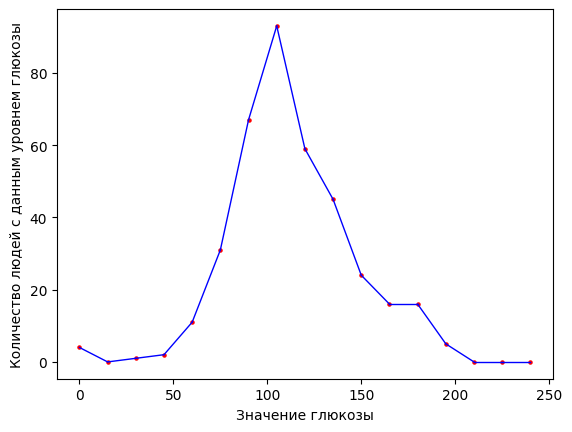

In [116]:
actual_df = first_df

gl_min, gl_max, gl_step = 0, 250, 15
gl_range = range(gl_min, gl_max, gl_step)
gl_count = [sum((gl <= actual_df['Glucose']) & (actual_df['Glucose'] < gl + gl_step))
                for gl in range(gl_min, gl_max, gl_step)]

for i in range(1, len(gl_count)):
    plt.plot(
        (gl_min + gl_step * (i - 1), gl_min + gl_step * i),
        (gl_count[i - 1], gl_count[i]),
        linewidth=1, color='blue')

plt.scatter(gl_range, gl_count,s=5, color='red')


plt.xlabel('Значение глюкозы')
plt.ylabel('Количество людей с данным уровнем глюкозы')

plt.show()

In [120]:
actual_df = first_df

glucose_values = actual_df['Glucose']
log_glucose = np.log(glucose_values[glucose_values != 0])
log_glucose_std = (log_glucose - np.mean(log_glucose)) / np.std(log_glucose)
ks_statistic, _ = stats.kstest(log_glucose_std, 'norm')

print("K-S statistic:", ks_statistic)


K-S statistic: 0.03807452415412016


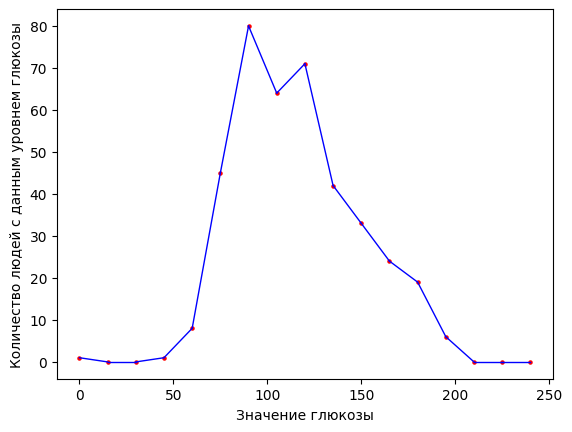

In [117]:
actual_df = second_df

gl_min, gl_max, gl_step = 0, 250, 15
gl_range = range(gl_min, gl_max, gl_step)
gl_count = [sum((gl <= actual_df['Glucose']) & (actual_df['Glucose'] < gl + gl_step))
                for gl in range(gl_min, gl_max, gl_step)]

for i in range(1, len(gl_count)):
    plt.plot(
        (gl_min + gl_step * (i - 1), gl_min + gl_step * i),
        (gl_count[i - 1], gl_count[i]),
        linewidth=1, color='blue')

plt.scatter(gl_range, gl_count,s=5, color='red')

plt.xlabel('Значение глюкозы')
plt.ylabel('Количество людей с данным уровнем глюкозы')

plt.show()

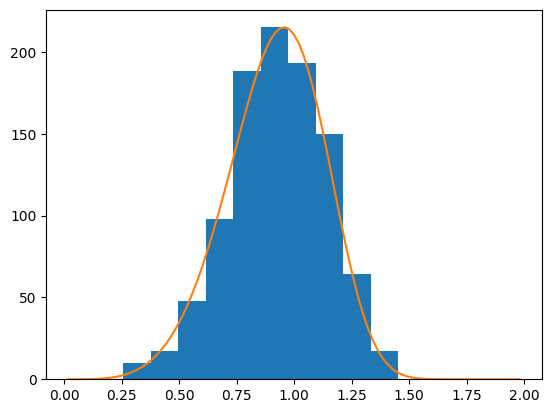

In [44]:
import matplotlib.pyplot as plt

x = np.arange(1,100.)/50.

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()

plt.plot(x, weib(x, 1., 5.)*scale)

plt.show()